## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

Using TensorFlow backend.
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\Sean\Anaconda3\envs\tensorflow-gpu\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\Sean\Anaconda3

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:

## 超參數設定
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.85

In [8]:
results = {}
"""
使用迴圈，建立不同 Learning rate 的模型並訓練
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with LR = 0.100000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [===========

50000/50000 [==============================] - 4s 72us/step - loss: 1.0273 - accuracy: 0.6282 - val_loss: 1.6850 - val_accuracy: 0.4780
Epoch 50/50
50000/50000 [==============================] - 4s 70us/step - loss: 1.0281 - accuracy: 0.6279 - val_loss: 1.6733 - val_accuracy: 0.4884
Experiment with LR = 0.010000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (D

50000/50000 [==============================] - 3s 59us/step - loss: 0.6693 - accuracy: 0.7620 - val_loss: 1.5528 - val_accuracy: 0.5276
Epoch 48/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.6605 - accuracy: 0.7677 - val_loss: 1.5453 - val_accuracy: 0.5387
Epoch 49/50
50000/50000 [==============================] - 3s 62us/step - loss: 0.6477 - accuracy: 0.7700 - val_loss: 1.5793 - val_accuracy: 0.5275
Epoch 50/50
50000/50000 [==============================] - 3s 61us/step - loss: 0.6297 - accuracy: 0.7759 - val_loss: 1.5345 - val_accuracy: 0.5387
Experiment with LR = 0.001000
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
___________________________________________

50000/50000 [==============================] - 3s 59us/step - loss: 1.3182 - accuracy: 0.5381 - val_loss: 1.4059 - val_accuracy: 0.4990
Epoch 46/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.3110 - accuracy: 0.5406 - val_loss: 1.3990 - val_accuracy: 0.5030
Epoch 47/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.3072 - accuracy: 0.5408 - val_loss: 1.4112 - val_accuracy: 0.5016
Epoch 48/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.2948 - accuracy: 0.5456 - val_loss: 1.3939 - val_accuracy: 0.5065
Epoch 49/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.2914 - accuracy: 0.5472 - val_loss: 1.4233 - val_accuracy: 0.4942
Epoch 50/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.2862 - accuracy: 0.5477 - val_loss: 1.3968 - val_accuracy: 0.5048
Experiment with LR = 0.000100
Model: "model_1"
_________________________________________________________________
Layer (type

50000/50000 [==============================] - 3s 57us/step - loss: 1.7681 - accuracy: 0.3845 - val_loss: 1.7714 - val_accuracy: 0.3841
Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 1.7646 - accuracy: 0.3854 - val_loss: 1.7679 - val_accuracy: 0.3859
Epoch 45/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7613 - accuracy: 0.3871 - val_loss: 1.7644 - val_accuracy: 0.3861
Epoch 46/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7578 - accuracy: 0.3883 - val_loss: 1.7611 - val_accuracy: 0.3885
Epoch 47/50
50000/50000 [==============================] - 3s 57us/step - loss: 1.7547 - accuracy: 0.3877 - val_loss: 1.7579 - val_accuracy: 0.3889
Epoch 48/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7511 - accuracy: 0.3910 - val_loss: 1.7549 - val_accuracy: 0.3907
Epoch 49/50
50000/50000 [==============================] - 3s 58us/step - loss: 1.7481 - accuracy: 0.3910 - val_loss: 1.7523

50000/50000 [==============================] - 3s 60us/step - loss: 2.1065 - accuracy: 0.2585 - val_loss: 2.1049 - val_accuracy: 0.2634
Epoch 42/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.1031 - accuracy: 0.2595 - val_loss: 2.1015 - val_accuracy: 0.2640
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0998 - accuracy: 0.2605 - val_loss: 2.0982 - val_accuracy: 0.2654
Epoch 44/50
50000/50000 [==============================] - 3s 60us/step - loss: 2.0965 - accuracy: 0.2619 - val_loss: 2.0949 - val_accuracy: 0.2670
Epoch 45/50
50000/50000 [==============================] - 3s 63us/step - loss: 2.0933 - accuracy: 0.2623 - val_loss: 2.0917 - val_accuracy: 0.2669
Epoch 46/50
50000/50000 [==============================] - 3s 61us/step - loss: 2.0902 - accuracy: 0.2639 - val_loss: 2.0886 - val_accuracy: 0.2686
Epoch 47/50
50000/50000 [==============================] - 3s 59us/step - loss: 2.0871 - accuracy: 0.2644 - val_loss: 2.0855

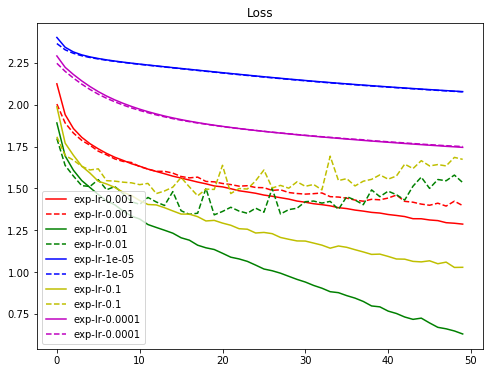

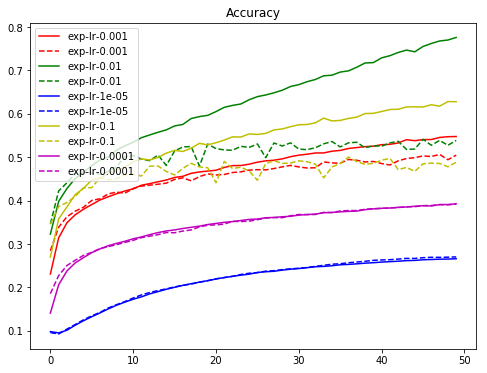

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()